In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

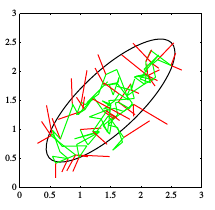

Fig.9 A simple illustration using Metropolis algorithm to sample from a Gaussian distribution whose one standard-deviation contour is shown by the ellipse. The proposal distribu- tion is an isotropic Gaussian distribution whose standard deviation is 0.2. Steps that are accepted are shown as green lines, and rejected steps are shown in red. A total of 150 candidate samples are generated, of which 43 are rejected.

## Markov Chain Monte Carlo (MCMC) and the Metropolis Algorithm

Markov Chain Monte Carlo (MCMC) is a powerful framework for sampling from probability distributions in high-dimensional spaces. This section focuses on the **Metropolis Algorithm**, a foundational MCMC method.

---

## Metropolis Algorithm

### Overview

The Metropolis algorithm generates a sequence of samples $ z^{(1)}, z^{(2)}, \ldots $ from a target distribution $ p(z) $, which is known up to a normalizing constant:
$$
p(z) = \frac{\tilde{p}(z)}{Z_p},
$$
where $ \tilde{p}(z) $ is a known unnormalized density, and $ Z_p $ is an unknown constant.

The key idea is to construct a **Markov chain** where:
1. The next sample depends only on the current sample.
2. The stationary distribution of the chain is the desired distribution $ p(z) $.

---

### Algorithm Steps

1. **Initialize**:
   - Choose an initial state $ z^{(0)} $.
   - Set iteration counter $ \tau = 0 $.

2. **Propose a new sample**:
   - Draw a candidate sample $ z^* $ from a **proposal distribution** $ q(z^* | z^{(\tau)}) $.

3. **Acceptance criterion**:
   - Compute the acceptance probability:
     $$
     A(z^*, z^{(\tau)}) = \min\left(1, \frac{\tilde{p}(z^*)}{\tilde{p}(z^{(\tau)})}\right),
     $$
     assuming $ q(z^* | z^{(\tau)}) $ is symmetric.

4. **Accept or reject**:
   - Generate a uniform random variable $ u \sim \text{Uniform}(0, 1) $.
   - If $ u \leq A(z^*, z^{(\tau)}) $, accept the proposal: $ z^{(\tau + 1)} = z^* $.
   - Otherwise, reject the proposal: $ z^{(\tau + 1)} = z^{(\tau)} $.

5. **Repeat**:
   - Increment $ \tau $ and return to Step 2 until the desired number of samples is generated.

---

### Key Properties

- **Stationarity**:
  The chain converges to the target distribution $ p(z) $ as $ \tau \to \infty $.

- **Correlations**:
  Consecutive samples are generally correlated. To reduce correlation, subsample the chain by retaining every $ M $-th sample (**thinning**).

---

### Example: Sampling from a 2D Gaussian Distribution

Consider a 2D Gaussian distribution with mean $ \mu = (0, 0) $ and covariance matrix:
$$
\Sigma = \begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}.
$$

The proposal distribution is an isotropic Gaussian:
$$
q(z^* | z) = \mathcal{N}(z; z, \sigma^2 I),
$$
where $ \sigma = 0.2 $.

---



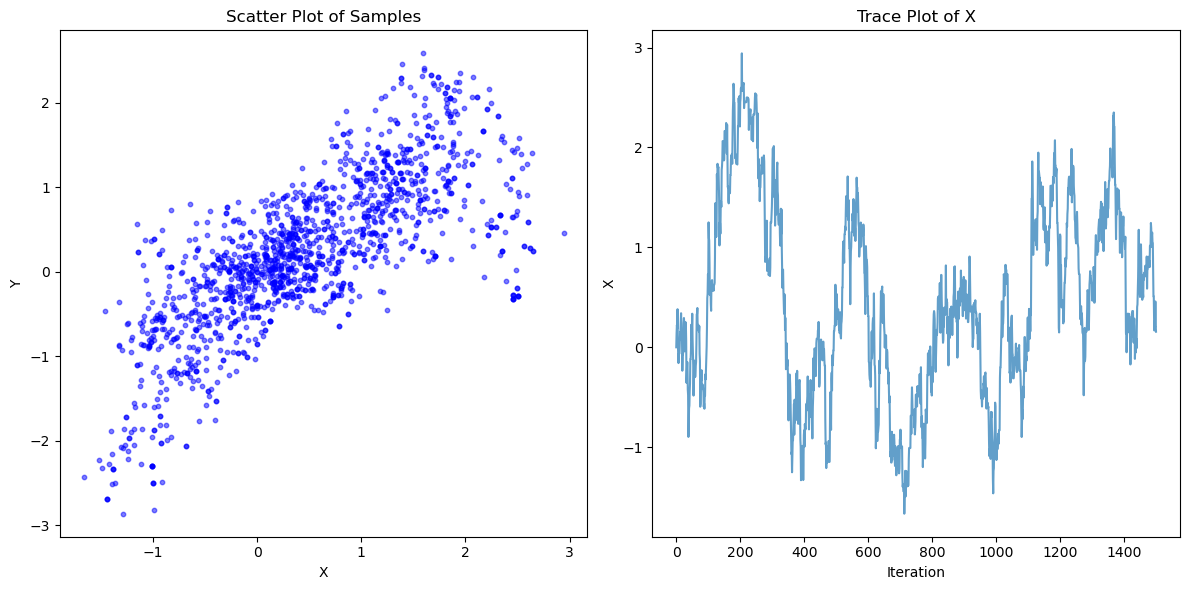

In [1]:
### Code Implementation

import random
import math
import matplotlib.pyplot as plt

def target_density(z):
    """Target distribution: 2D Gaussian."""
    x, y = z
    return math.exp(-0.5 * (x**2 + y**2 - 2 * 0.8 * x * y) / (1 - 0.8**2))

def metropolis_algorithm(num_samples, initial_state, proposal_std):
    """
    Implements the Metropolis algorithm.

    Args:
        num_samples: Number of samples to generate.
        initial_state: Initial state of the chain.
        proposal_std: Standard deviation of the proposal distribution.

    Returns:
        List of samples (as tuples).
    """
    samples = [initial_state]
    current_state = initial_state

    for _ in range(num_samples):
        # Propose a new state
        proposed_state = (
            current_state[0] + random.gauss(0, proposal_std),
            current_state[1] + random.gauss(0, proposal_std)
        )

        # Compute acceptance probability
        acceptance_prob = min(
            1,
            target_density(proposed_state) / target_density(current_state)
        )

        # Accept or reject the proposed state
        if random.uniform(0, 1) < acceptance_prob:
            current_state = proposed_state

        samples.append(current_state)

    return samples

# Parameters
num_samples = 1500
initial_state = (0, 0)
proposal_std = 0.2

# Run Metropolis algorithm
samples = metropolis_algorithm(num_samples, initial_state, proposal_std)

# Extract x and y coordinates of the samples
x_samples, y_samples = zip(*samples)

# Plotting
plt.figure(figsize=(12, 6))

# Scatter plot of samples
plt.subplot(1, 2, 1)
plt.scatter(x_samples, y_samples, s=10, alpha=0.5, c="blue")
plt.title("Scatter Plot of Samples")
plt.xlabel("X")
plt.ylabel("Y")

# Trace plot of x-coordinates
plt.subplot(1, 2, 2)
plt.plot(x_samples, alpha=0.7)
plt.title("Trace Plot of X")
plt.xlabel("Iteration")
plt.ylabel("X")

plt.tight_layout()
plt.show()


## Markov Chains: Properties and Applications in MCMC

Markov chains form the foundation for many Monte Carlo methods, including Markov Chain Monte Carlo (MCMC). This section explores the properties of Markov chains that ensure convergence to the desired distribution.

---

## Definition of a Markov Chain

A **first-order Markov chain** is a sequence of random variables $ z^{(1)}, z^{(2)}, \ldots, z^{(M)} $ where the conditional independence property holds:
$$
p(z^{(m+1)} | z^{(1)}, \ldots, z^{(m)}) = p(z^{(m+1)} | z^{(m)}), \quad \forall m \in \{1, \ldots, M-1\}.
$$
This dependency structure is often represented as a directed graph in the form of a chain.

The chain is specified by:
1. An **initial distribution** $ p(z^{(0)}) $.
2. A set of **transition probabilities** $ T_m(z^{(m)}, z^{(m+1)}) $, where:
   $$
   T_m(z^{(m)}, z^{(m+1)}) \equiv p(z^{(m+1)} | z^{(m)}).
   $$

---

## Homogeneous Markov Chains

A Markov chain is **homogeneous** if the transition probabilities $ T(z, z') $ are the same for all steps $ m $.

The marginal probability at step $ m+1 $ is expressed recursively as:
$$
p(z^{(m+1)}) = \sum_{z^{(m)}} p(z^{(m+1)} | z^{(m)}) p(z^{(m)}).
$$

---

## Stationary Distributions

A distribution $ p^*(z) $ is **stationary** (or invariant) with respect to a Markov chain if:
$$
p^*(z) = \sum_{z'} T(z', z) p^*(z').
$$

### Detailed Balance

A sufficient condition for stationarity is **detailed balance**:
$$
p^*(z) T(z, z') = p^*(z') T(z', z), \quad \forall z, z'.
$$

If a Markov chain satisfies detailed balance, the stationary distribution $ p^*(z) $ is preserved.

### Reversibility

A Markov chain that satisfies detailed balance is said to be **reversible**. Reversible chains are widely used in MCMC algorithms because they ensure convergence to the desired stationary distribution.

---

## Ergodicity and Convergence

For a Markov chain to converge to the stationary distribution $ p^*(z) $, it must be **ergodic**, meaning:
1. The chain is **irreducible**: It is possible to reach any state $ z $ from any other state $ z' $.
2. The chain is **aperiodic**: It does not have deterministic cyclic behavior.

If these conditions are met, then as $ m \to \infty $, the distribution of $ z^{(m)} $ converges to $ p^*(z) $, regardless of the initial distribution $ p(z^{(0)}) $.

The stationary distribution in this case is referred to as the **equilibrium distribution**.

---

## Composite Transition Probabilities

Transition probabilities can be constructed using multiple base transitions:
1. **Mixture distribution**:
   $$
   T(z', z) = \sum_{k=1}^K \alpha_k B_k(z', z),
   $$
   where $ \alpha_k \geq 0 \) and \( \sum_{k=1}^K \alpha_k = 1 $.

2. **Successive application**:
   $$
   T(z', z) = \sum_{z_1, \ldots, z_{K-1}} B_1(z', z_1) B_2(z_1, z_2) \cdots B_K(z_{K-1}, z).
   $$

### Detailed Balance in Composite Transitions

- For mixture distributions, if each base transition $ B_k(z', z) $ satisfies detailed balance, then $ T(z', z) $ also satisfies detailed balance.
- For successive applications, detailed balance is not guaranteed but can be restored by symmetrizing the sequence of transitions, e.g., $ B_1, B_2, \ldots, B_K, B_K, \ldots, B_2, B_1 $.

---

## Applications in MCMC

Markov chains are used in MCMC to sample from a desired distribution $ p^*(z) $:
1. A Markov chain is constructed such that $ p^*(z) $ is the stationary distribution.
2. Ergodicity ensures convergence to $ p^*(z) $ regardless of the initial state.

By leveraging the properties of detailed balance and ergodicity, MCMC methods like the Metropolis algorithm and Gibbs sampling enable efficient exploration of complex distributions.



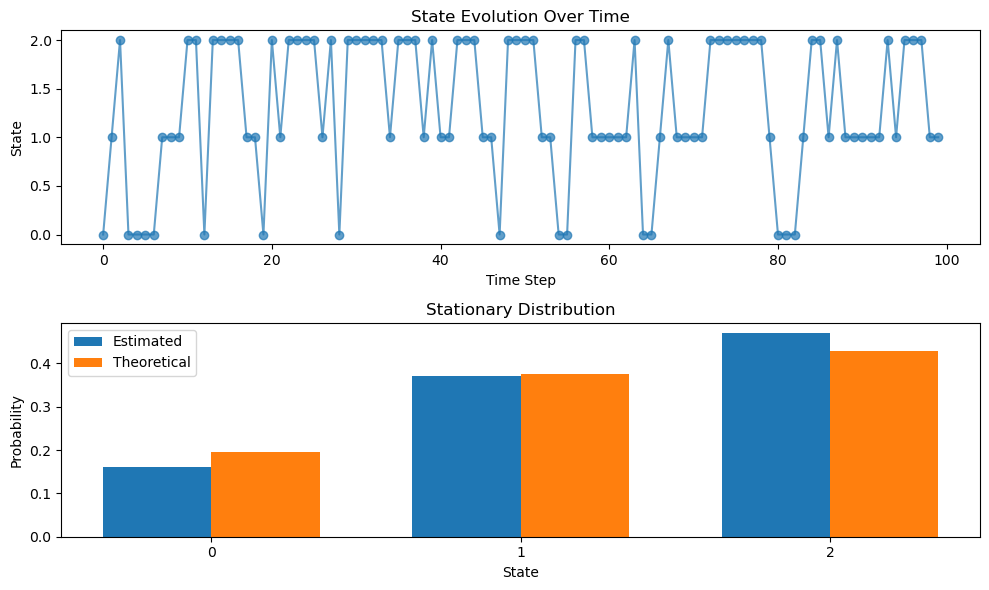

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define transition matrix T
T = np.array([
    [0.4, 0.3, 0.3],
    [0.2, 0.5, 0.3],
    [0.1, 0.3, 0.6]
])

# Verify that T is a valid transition matrix (rows should sum to 1)
assert np.allclose(T.sum(axis=1), 1), "Rows of the transition matrix must sum to 1"

# Number of states
n_states = T.shape[0]

# Initial distribution (arbitrary)
p_initial = np.array([1.0, 0.0, 0.0])  # Start in state 0

# Simulate the Markov chain
n_steps = 100
states = np.zeros(n_steps, dtype=int)
states[0] = np.random.choice(n_states, p=p_initial)

for t in range(1, n_steps):
    current_state = states[t - 1]
    states[t] = np.random.choice(n_states, p=T[current_state])

# Estimate the stationary distribution
state_counts = np.bincount(states, minlength=n_states)
stationary_distribution_est = state_counts / n_steps

# Calculate theoretical stationary distribution
eigvals, eigvecs = np.linalg.eig(T.T)
stationary_distribution_theory = eigvecs[:, np.argmax(np.isclose(eigvals, 1.0))].real
stationary_distribution_theory /= stationary_distribution_theory.sum()  # Normalize

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the state evolution
plt.subplot(2, 1, 1)
plt.plot(states, marker='o', linestyle='-', alpha=0.7)
plt.title("State Evolution Over Time")
plt.xlabel("Time Step")
plt.ylabel("State")

# Compare estimated vs theoretical stationary distributions
plt.subplot(2, 1, 2)
x = np.arange(n_states)
width = 0.35
plt.bar(x - width/2, stationary_distribution_est, width, label="Estimated")
plt.bar(x + width/2, stationary_distribution_theory, width, label="Theoretical")
plt.title("Stationary Distribution")
plt.xlabel("State")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()


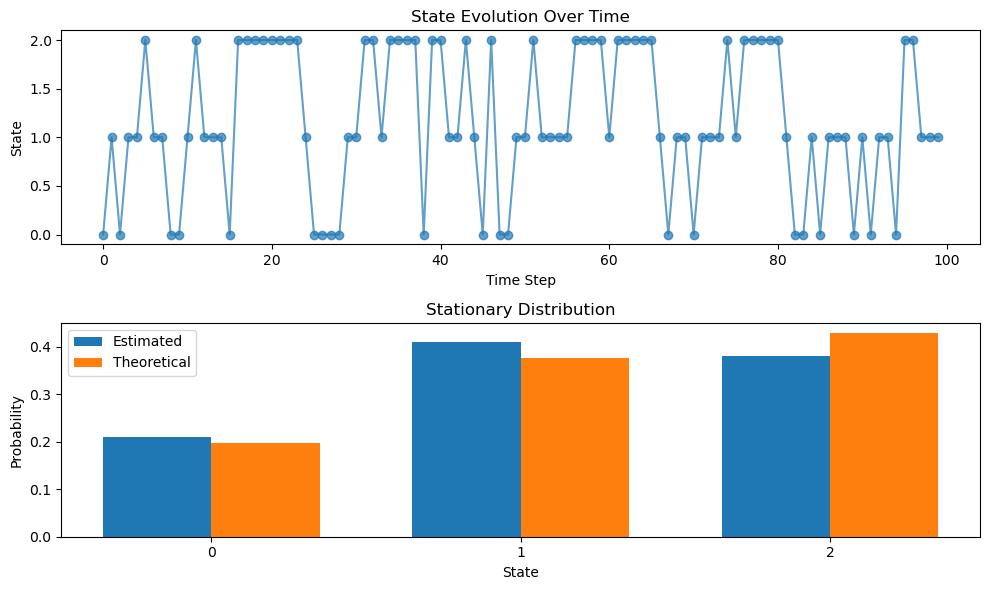

In [3]:
import random
import matplotlib.pyplot as plt

# Define transition matrix T as a nested list
T = [
    [0.4, 0.3, 0.3],
    [0.2, 0.5, 0.3],
    [0.1, 0.3, 0.6]
]

# Verify that T is a valid transition matrix (rows should sum to 1)
for row in T:
    assert abs(sum(row) - 1.0) < 1e-6, "Rows of the transition matrix must sum to 1"

# Number of states
n_states = len(T)

# Initial distribution
p_initial = [1.0, 0.0, 0.0]  # Start in state 0

# Simulate the Markov chain
n_steps = 100
states = [0] * n_steps  # List to store state transitions
states[0] = random.choices(range(n_states), weights=p_initial, k=1)[0]

for t in range(1, n_steps):
    current_state = states[t - 1]
    states[t] = random.choices(range(n_states), weights=T[current_state], k=1)[0]

# Estimate the stationary distribution
state_counts = [0] * n_states
for state in states:
    state_counts[state] += 1
stationary_distribution_est = [count / n_steps for count in state_counts]

# Calculate theoretical stationary distribution
def multiply_vector_matrix(vector, matrix):
    """Multiply a vector by a matrix."""
    result = [0] * len(vector)
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            result[i] += vector[j] * matrix[j][i]
    return result

def normalize(vector):
    """Normalize a vector so its elements sum to 1."""
    total = sum(vector)
    return [x / total for x in vector]

# Start with an arbitrary vector and iterate until convergence
stationary_distribution_theory = [1.0 / n_states] * n_states
for _ in range(1000):  # Iterative process to find the stationary distribution
    stationary_distribution_theory = multiply_vector_matrix(stationary_distribution_theory, T)
    stationary_distribution_theory = normalize(stationary_distribution_theory)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the state evolution
plt.subplot(2, 1, 1)
plt.plot(states, marker='o', linestyle='-', alpha=0.7)
plt.title("State Evolution Over Time")
plt.xlabel("Time Step")
plt.ylabel("State")

# Compare estimated vs theoretical stationary distributions
plt.subplot(2, 1, 2)
x = range(n_states)
width = 0.35
plt.bar([xi - width/2 for xi in x], stationary_distribution_est, width, label="Estimated")
plt.bar([xi + width/2 for xi in x], stationary_distribution_theory, width, label="Theoretical")
plt.title("Stationary Distribution")
plt.xlabel("State")
plt.ylabel("Probability")
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()
